In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tabulate import tabulate 
import glob

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
NABIS = pd.read_csv("./진짜 진짜 진짜로 전처리 완료된 대회 분석 데이터.csv")
NABIS = pd.DataFrame(NABIS)
NABIS

,Unnamed: 0,연도,의료수가,가중치,지역 소아과 수,최종수가,강원특별자치도_건강보험,강원특별자치도_소아과 병원 수,강원특별자치도_소아과 의료인력 수,강원특별자치도_천명당 소아과 수,...,전북특별자치도_소아과 병원 수_표준화,전북특별자치도_소아과 의료인력 수_표준화,전라남도_소아과 병원 수_표준화,전라남도_소아과 의료인력 수_표준화,경상북도_소아과 병원 수_표준화,경상북도_소아과 의료인력 수_표준화,경상남도_소아과 병원 수_표준화,경상남도_소아과 의료인력 수_표준화,제주특별자치도_소아과 병원 수_표준화,제주특별자치도_소아과 의료인력 수_표준화
0,0,2019,258854,74.9,864,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
1,1,2019,258854,83.4,864,21588423.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
2,2,2019,258854,74.9,10940,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
3,3,2019,258854,83.4,10940,21588423.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
4,4,2019,258854,74.9,8032,19388164.6,1491120,864,527,0.142105,...,1.532478,-0.463988,1.310556,0.110959,0.848528,1.163333,1.427416,-1.091442,-1.647064,-1.598822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,1787,2022,617545,78.4,8032,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1788,1788,2022,617545,78.4,996,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1789,1789,2022,617545,90.2,996,55702559.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767
1790,1790,2022,617545,78.4,816,48415528.0,1503671,904,618,0.148003,...,-0.998219,1.716757,-0.087370,-0.776713,-0.848528,-1.398134,-0.965205,1.570042,0.930949,1.157767


In [3]:
from sklearn.cluster import KMeans

features = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', '제주특별자치도 건강보험_표준화', '제주특별자치도_소아과 병원 수_표준화', "제주특별자치도_소아과 의료인력 수_표준화", "제주특별자치도_천명당 소아과 수"]]

# n_clusters: 군집 개수를 설정 
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=43)

NABIS['K-MEAN 군집'] = kmeans.fit_predict(features)

KGoonjib = './K-MEAN 제주특별자치도 군집화 결과2.xlsx'
NABIS.to_excel(KGoonjib, index=False)

NABIS['K-MEAN 군집'].value_counts()

K-MEAN 군집
0    448
2    448
1    448
3    448
Name: count, dtype: int64

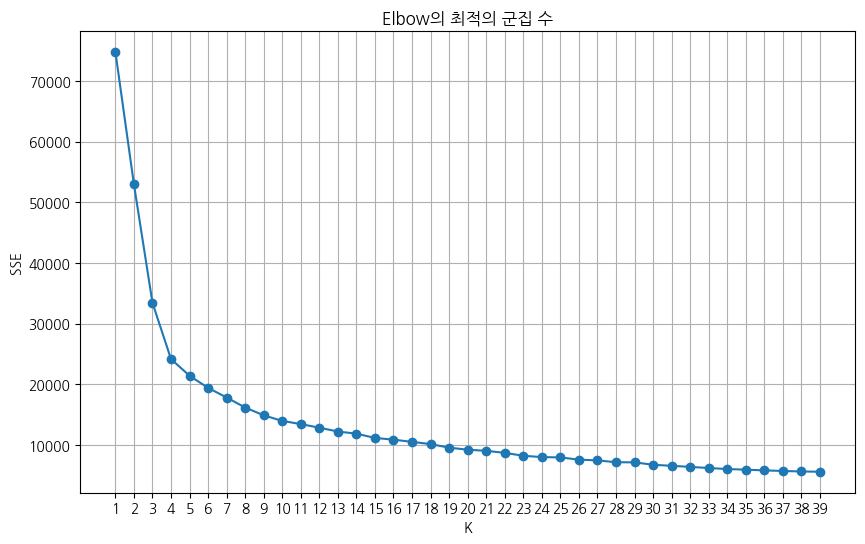

In [4]:
# Elbow 방법으로 SSE(군집내 제곱합)을 계산하여 최적의 군집 수 찾기
sse = []  
k_range = range(1, 40)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=43)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()

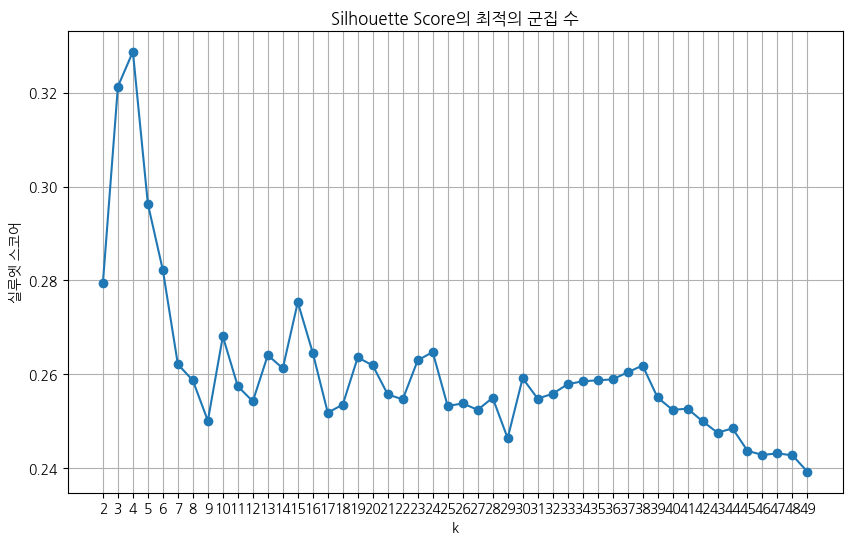

In [5]:
from sklearn.metrics import silhouette_score

# 실루엣 계수로 최적의 군집 수 찾기
silhouette_scores = []
k_range = range(2, 50)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=43)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('실루엣 스코어')
plt.title('Silhouette Score의 최적의 군집 수')
plt.xticks(k_range)
plt.grid(True)
plt.show()


군집별 데이터 수:
 K-MEAN 군집
0    448
2    448
1    448
3    448
Name: count, dtype: int64

군집별 평균값:
            Unnamed: 0      연도          의료수가        가중치  지역 소아과 수  \
K-MEAN 군집                                                          
0               439.5  2020.5  1.319681e+06  80.468750    4199.5   
1              1335.5  2020.5  1.615130e+06  80.468750    4199.5   
2               455.5  2020.5  1.319681e+06  79.840625    4613.5   
3              1351.5  2020.5  1.615130e+06  79.840625    4613.5   

                   최종수가  강원특별자치도_건강보험  강원특별자치도_소아과 병원 수  강원특별자치도_소아과 의료인력 수  \
K-MEAN 군집                                                                     
0          1.062719e+08     1497294.5             887.0               565.5   
1          1.298619e+08     1497294.5             887.0               565.5   
2          1.054398e+08     1497294.5             887.0               565.5   
3          1.288517e+08     1497294.5             887.0               565.5   

           강원특별자치도_천

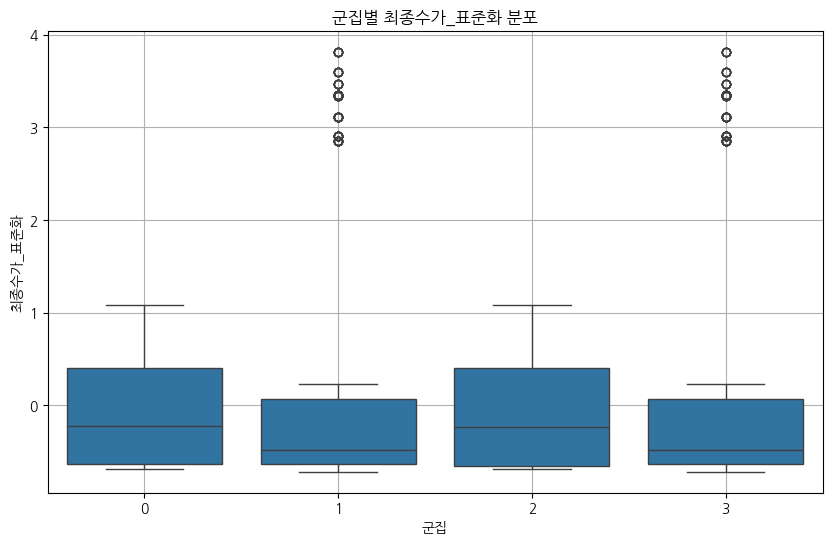

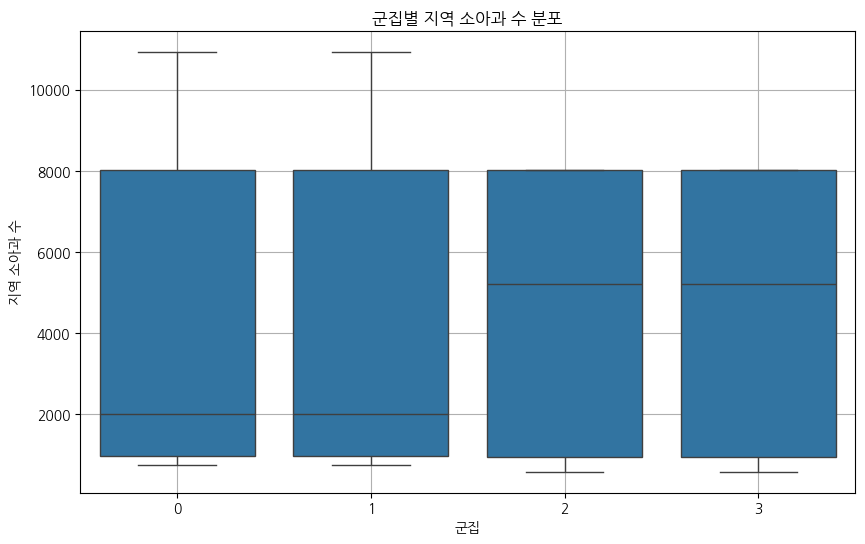

In [6]:
# k-mean 군집화 분석 

Kcluster_counts = NABIS['K-MEAN 군집'].value_counts()
print("\n군집별 데이터 수:\n", Kcluster_counts)

Kcluster_means = NABIS.groupby('K-MEAN 군집').mean()
print("\n군집별 평균값:\n", Kcluster_means)

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='최종수가_표준화', data=NABIS)
plt.title('군집별 최종수가_표준화 분포')
plt.xlabel('군집')
plt.ylabel('최종수가_표준화')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='K-MEAN 군집', y='지역 소아과 수', data=NABIS)
plt.title('군집별 지역 소아과 수 분포')
plt.xlabel('군집')
plt.ylabel('지역 소아과 수')
plt.grid(True)
plt.show()

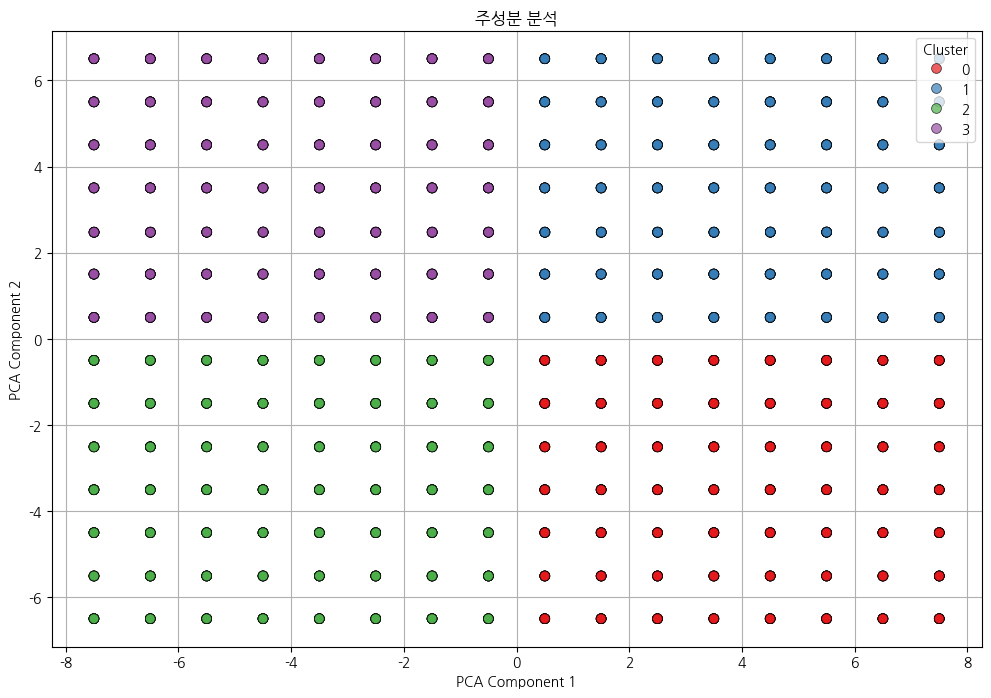

In [7]:
# PCA
from sklearn.decomposition import PCA
NABIS1 = NABIS.copy()

# 2차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

NABIS1['PCA1'] = pca_result[:, 0]
NABIS1['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='K-MEAN 군집', palette='Set1', data=NABIS1, s=50, alpha=0.7, edgecolor='k')
plt.title('주성분 분석')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [8]:
NABIS.columns

Index(['Unnamed: 0', '연도', '의료수가', '가중치', '지역 소아과 수', '최종수가', '강원특별자치도_건강보험',
       '강원특별자치도_소아과 병원 수', '강원특별자치도_소아과 의료인력 수', '강원특별자치도_천명당 소아과 수',
       ...
       '전북특별자치도_소아과 의료인력 수_표준화', '전라남도_소아과 병원 수_표준화', '전라남도_소아과 의료인력 수_표준화',
       '경상북도_소아과 병원 수_표준화', '경상북도_소아과 의료인력 수_표준화', '경상남도_소아과 병원 수_표준화',
       '경상남도_소아과 의료인력 수_표준화', '제주특별자치도_소아과 병원 수_표준화', '제주특별자치도_소아과 의료인력 수_표준화',
       'K-MEAN 군집'],
      dtype='object', length=122)

[0]	validation_0-rmse:0.00916	validation_1-rmse:0.00948
[1]	validation_0-rmse:0.00906	validation_1-rmse:0.00938
[2]	validation_0-rmse:0.00897	validation_1-rmse:0.00929
[3]	validation_0-rmse:0.00888	validation_1-rmse:0.00919
[4]	validation_0-rmse:0.00880	validation_1-rmse:0.00910
[5]	validation_0-rmse:0.00871	validation_1-rmse:0.00901
[6]	validation_0-rmse:0.00862	validation_1-rmse:0.00892
[7]	validation_0-rmse:0.00854	validation_1-rmse:0.00883
[8]	validation_0-rmse:0.00845	validation_1-rmse:0.00875
[9]	validation_0-rmse:0.00837	validation_1-rmse:0.00866
[10]	validation_0-rmse:0.00828	validation_1-rmse:0.00857
[11]	validation_0-rmse:0.00820	validation_1-rmse:0.00849
[12]	validation_0-rmse:0.00812	validation_1-rmse:0.00840
[13]	validation_0-rmse:0.00804	validation_1-rmse:0.00832
[14]	validation_0-rmse:0.00796	validation_1-rmse:0.00824
[15]	validation_0-rmse:0.00788	validation_1-rmse:0.00815
[16]	validation_0-rmse:0.00780	validation_1-rmse:0.00807
[17]	validation_0-rmse:0.00772	validation

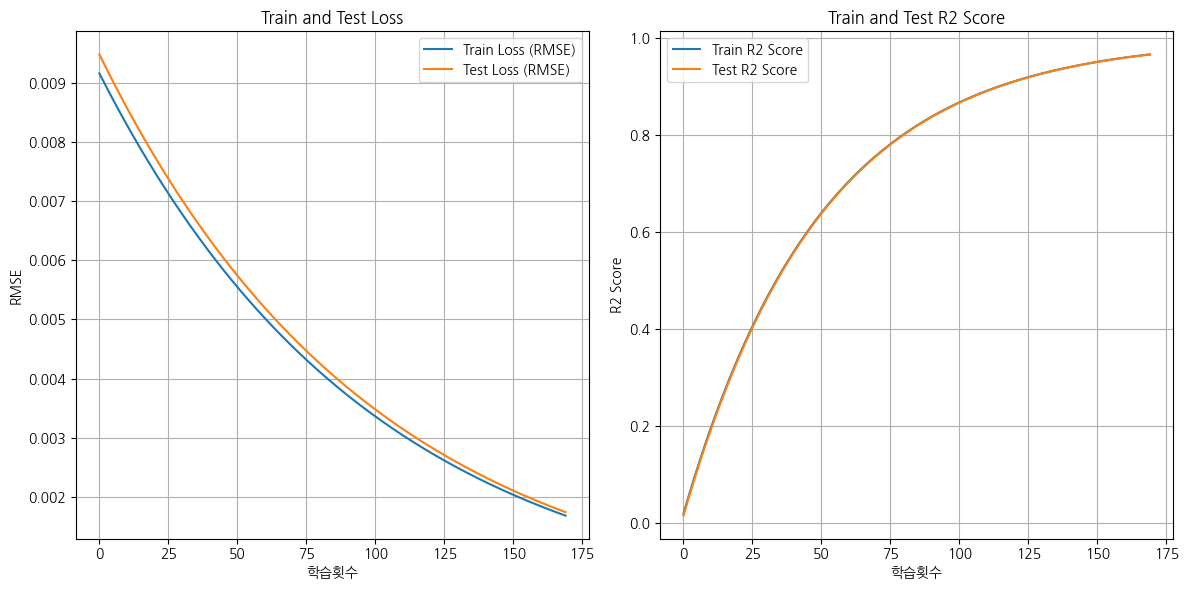


최종 Mean Squared Error: 0.00
최종 R2 Score: 0.97


['./xgboost_jeju_model.pkl']

In [9]:
X = NABIS[['진료과목_인코딩', '지역_인코딩', '의료기관_인코딩', '최종수가_표준화', 'K-MEAN 군집', '제주특별자치도 건강보험_표준화', '의료수가_표준화', "제주특별자치도_소아과 병원 수_표준화",
           "제주특별자치도_소아과 의료인력 수_표준화", "제주특별자치도_소아과 병원 수"]]
y = NABIS['제주특별자치도_천명당 소아과 수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=170, learning_rate=0.01, max_depth=7, random_state=43)

# 모델 학습
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

evals_result = xgb_model.evals_result()
train_loss = evals_result['validation_0']['rmse']
test_loss = evals_result['validation_1']['rmse']

train_r2_scores = []
test_r2_scores = []

for i in range(len(train_loss)):
    y_train_pred = xgb_model.predict(X_train, iteration_range=(0, i + 1))
    y_test_pred = xgb_model.predict(X_test, iteration_range=(0, i + 1))
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss (RMSE)')
plt.plot(test_loss, label='Test Loss (RMSE)')
plt.xlabel('학습횟수')
plt.ylabel('RMSE')
plt.title('Train and Test Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_r2_scores, label='Train R2 Score')
plt.plot(test_r2_scores, label='Test R2 Score')
plt.xlabel('학습횟수')
plt.ylabel('R2 Score')
plt.title('Train and Test R2 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n최종 Mean Squared Error: {mse:.2f}")
print(f"최종 R2 Score: {r2:.2f}")

# 모델 저장 
joblib.dump(xgb_model, './xgboost_jeju_model.pkl')

In [10]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R2: {r2}')

MSE: 3.0345709891149757e-06, R2: 0.9667394624506547


In [11]:
xgb_model = joblib.load('./xgboost_jeju_model.pkl')

scaler = StandardScaler()
scaler.fit(X_train)  
input_data = {
    '진료과목_인코딩': [3],  
    '지역_인코딩': [13],         # 고정값
    '의료기관_인코딩': [1], 
    '최종수가_표준화': [0.8],  
    'K-MEAN 군집': [1], 
    '제주특별자치도 건강보험_표준화': [0],
    '의료수가_표준화': [1],
    "제주특별자치도_소아과 병원 수_표준화" :[0.9],
    "제주특별자치도_소아과 의료인력 수_표준화" :[0.9],
    "제주특별자치도_소아과 병원 수":[400]
}
input_df = pd.DataFrame(input_data)

input_scaled = scaler.transform(input_df)

prediction_1 = xgb_model.predict(input_scaled)
print(f'예측 결과: {prediction_1[0]} (표준화된 소아과 병원 수)')

예측 결과: 0.1971319168806076 (표준화된 소아과 병원 수)
